### Sharon Tsao
### UNI: sjt2141
### Task 1

In [ ]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
#from scipy import stats, integrate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
%matplotlib inline

In [174]:
# description of data: http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html
california_data = fetch_california_housing()

In [175]:
description = california_data['DESCR']
X = california_data['data']
features = california_data['feature_names']
y = california_data['target']

In [286]:
#setting counts
feature_count = len(X[0])

### Task 1.1

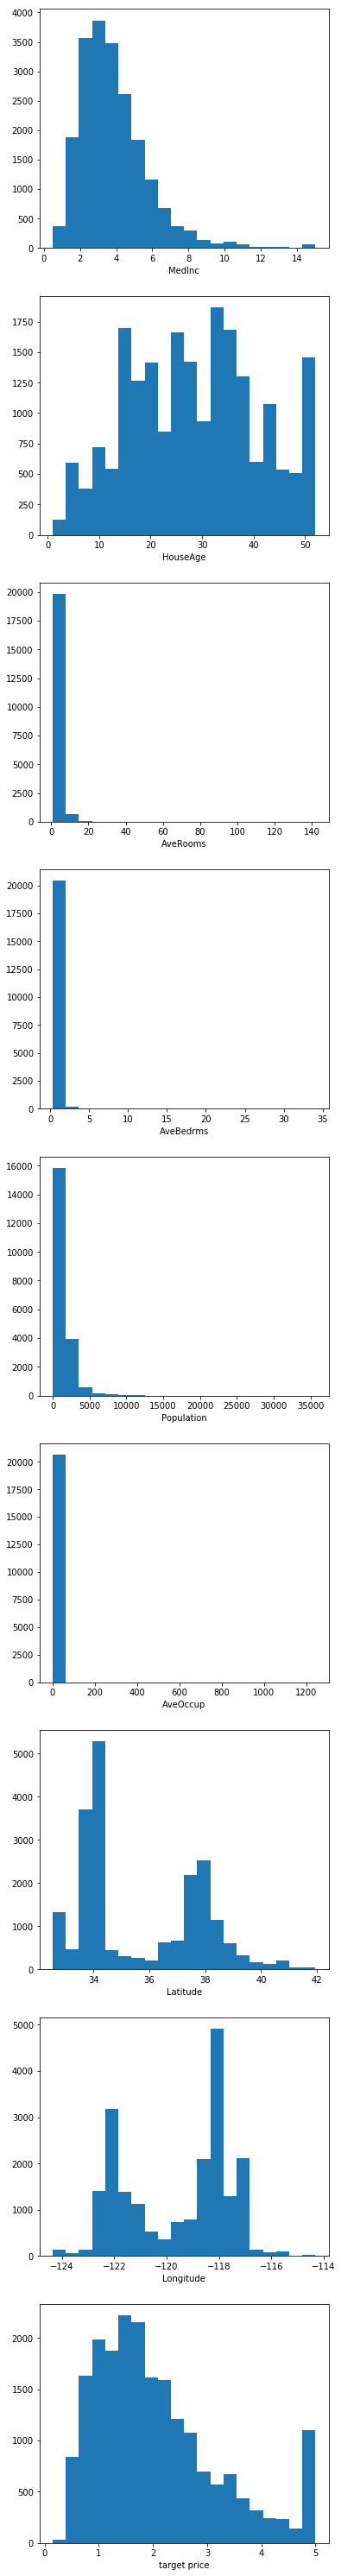

In [303]:
# feature count + 1 for the target
fig, ax = plt.subplots(feature_count +1, 1, figsize=(6, 54))

for i in range(feature_count):
    ax[i].hist(X[:, i], bins= 20)
    ax[i].set_xlabel(features[i])
i = i+1

ax[i].hist(y, bins= 20)
ax[i].set_xlabel('target price')
plt.show()

From the univariate distribution of each graph, there are some very extreme outliers in average occupancy, average bedrooms, and average rooms. Hence, the graph is showing a big range despite most of the data is centralized to the left. When analyzing the data, it might be helpful to remove the outliers. 

### Task 1.2

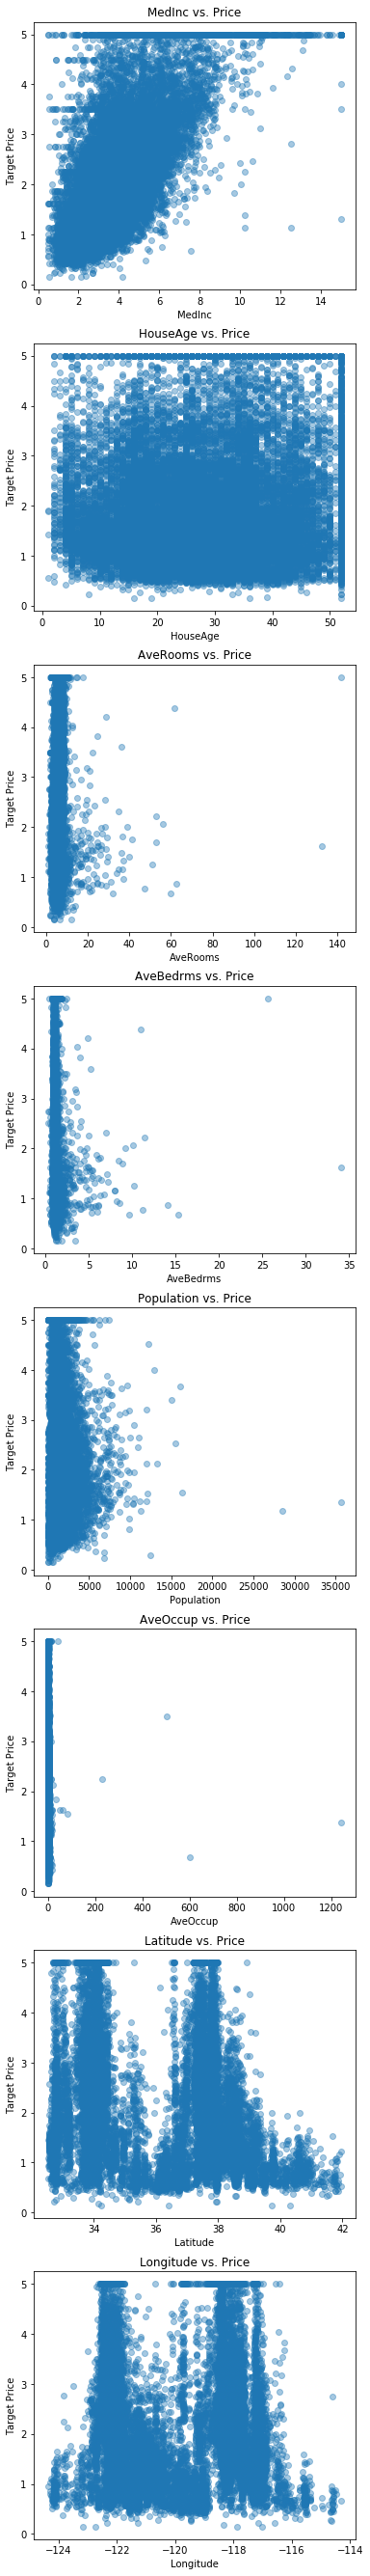

In [150]:
fig, ax = plt.subplots(feature_count, 1, figsize=(6, 48))

for i in range(feature_count):
    ax[i].scatter(X[:, i], y, alpha = 0.4)
    ax[i].set_xlabel(features[i])
    ax[i].set_ylabel('Target Price')
    ax[i].set_title(features[i]+' vs. Price')
    

### Task 1.3

In [187]:
#Splitting Data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Without Scaling

In [288]:
#OLS, Ridge, Lasso, EN without scaling

#QUESTION: if we cross validate, do we still need to split into train and test data? 

ols = linear_model.LinearRegression()
#ols.fit(X_train, y_train)
#ols_y_pred = ols.predict(X_train)
print 'Linear Regression Score:'
print np.mean(cross_val_score(LinearRegression(), X_train, y_train))

rr = linear_model.Ridge()
#rr.fit(X_train, y_train)
#rr_y_pred = rr.predict(X_train)
print 'Ridge Regression Score:'
print np.mean(cross_val_score(Ridge(), X_train, y_train))

lasso = linear_model.Lasso()
#lasso.fit(X_train, y_train)
#lasso_y_pred = lasso.predict(X_train)
print 'LASSO Score:'
print np.mean(cross_val_score(Lasso(), X_train, y_train))

elasnet = linear_model.ElasticNet()
#elasnet.fit(X_train, y_train)
#elasnet_y_pred = elasnet.predict(X_train)
print 'Elastic Net Score:'
print np.mean(cross_val_score(ElasticNet(), X_train, y_train))

Linear Regression Score:
0.608159196158
Ridge Regression Score:
0.60817074429
LASSO Score:
0.292063342837
Elastic Net Score:
0.430003429158


With Scaling

In [289]:
#OLS, Ridge, Lasso, EN with scaling

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
#rr_scaled = Ridge().fit(X_train_scaled, y_train)
#rr_scaled_pred = rr_scaled.predict(X_train_scaled)

print 'Linear Regression Score:'
print np.mean(cross_val_score(LinearRegression(), X_train_scaled, y_train))
print 'Ridge Regression Score:'
print np.mean(cross_val_score(Ridge(), X_train_scaled, y_train))

#X_test_scaled = scaler.transform(X_test)
#print ridge.score(X_test_scaled, y_test)
print 'LASSO Regression Score:'
print np.mean(cross_val_score(Lasso(), X_train_scaled, y_train))
print 'Elastic Net Regression Score:'
print np.mean(cross_val_score(ElasticNet(), X_train_scaled, y_train))

Linear Regression Score:
0.608159196158
Ridge Regression Score:
0.608164605669
LASSO Regression Score:
-4.2686141089e-05
Elastic Net Regression Score:
0.210512173059


With scaling, the result didn’t change much for linear regression and ridge regression. However, the score for LASSO went down from 0.3 to close to 0, and the score for elastic net went down from 0.43 to 0.21. We are not going to use the scaled X for LASSO and Elastic Net.


### Task 1.4

Best Parameter:
{'alpha': 10.0}
Best Score:
0.608197342548


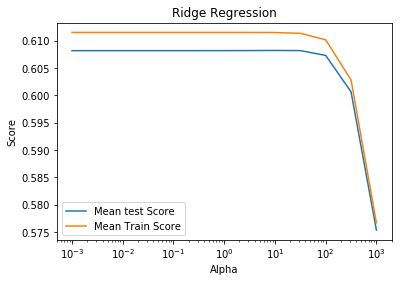

In [294]:
#Grid Search for Ridge

param_grid = {'alpha': np.logspace(-3, 3, 13)}
grid = GridSearchCV(Ridge(), param_grid)
grid.fit(X_train_scaled, y_train)
print 'Best Parameter:'
print(grid.best_params_)
print 'Best Score:'
print(grid.best_score_)

plt.plot(np.logspace(-3, 3, 13), grid.cv_results_['mean_test_score'], label = 'Mean test Score')
plt.plot(np.logspace(-3, 3, 13), grid.cv_results_['mean_train_score'], label = 'Mean Train Score')
plt.ylabel('Score')
plt.xlabel('Alpha')
plt.title('Ridge Regression')
plt.xscale("log")
plt.legend()
plt.show()

In [293]:
#Grid Search for Lasso

param_grid = {'alpha': np.logspace(-6, 2, 13)}
grid = GridSearchCV(Lasso(normalize=True), param_grid)
grid.fit(X_train, y_train)
print 'Best Parameter:'
print(grid.best_params_)
print 'Best Score:'
print(grid.best_score_)

Best Parameter:
{'alpha': 2.1544346900318823e-05}
Best Score:
0.608237651303


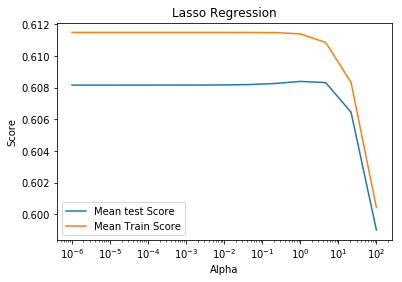

In [264]:
plt.plot(np.logspace(-6, 2, 13), grid.cv_results_['mean_test_score'], label = 'Mean test Score')
plt.plot(np.logspace(-6, 2, 13), grid.cv_results_['mean_train_score'], label = 'Mean Train Score')
plt.ylabel('Score')
plt.xlabel('Alpha')
plt.title('Lasso Regression')
plt.xscale("log")
plt.legend()
plt.show()

In [292]:
#Grid Search for Elastic Net

param_grid = {'alpha': np.logspace(-4, -1, 10),
              'l1_ratio': [0.01, .1, .5, .9, .98, 1]}
grid = GridSearchCV(ElasticNet(), param_grid)
grid.fit(X_train, y_train)
print 'Best Parameter:'
print(grid.best_params_)
print 'Best Score:'
print(grid.best_score_)

Best Parameter:
{'alpha': 0.0046415888336127772, 'l1_ratio': 0.01}
Best Score:
0.608430902042


In [282]:
table = pd.pivot_table(pd.DataFrame(grid.cv_results_), values = 'mean_test_score', index='param_alpha', columns ='param_l1_ratio')


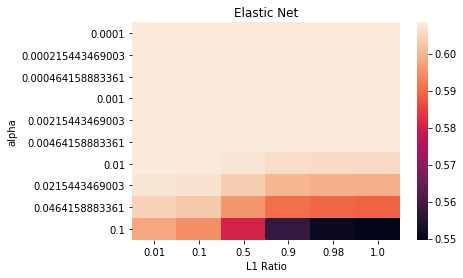

In [290]:
import seaborn as sns
htmap = sns.heatmap(data = table)
plt.title('Elastic Net')
plt.xlabel('L1 Ratio')
plt.ylabel('alpha')
plt.show()

Ridge Regression: even though the alpha is 31.6, the actual score did not change much. It still hovers at around 0.608. 

LASSO: non-scaled X_train is being used here, since the scaled X data didn’t help earlier. GridSearch did not help much. The optimal alpha is close to 0.

Elastic Net: GridSearch helped a lot here, with alpha close to 0.0046 and L1 at 0.01. The score improved from 0.43 (unscaled)  to 0.608. 


### Task 1.5

In [235]:
ols = LinearRegression().fit(X_train_scaled, y_train)
elastnet = ElasticNet(alpha = 0.0046415888336127772).fit(X_train_scaled, y_train)

In [236]:
ols_coef = ols.coef_
elastnet_coef = elastnet.coef_

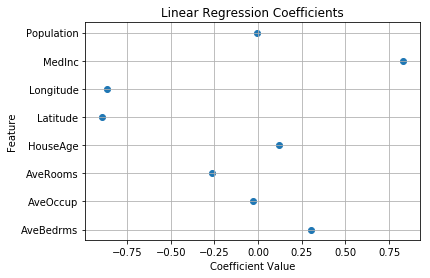

In [302]:
plt.scatter(ols_coef, features)
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid()

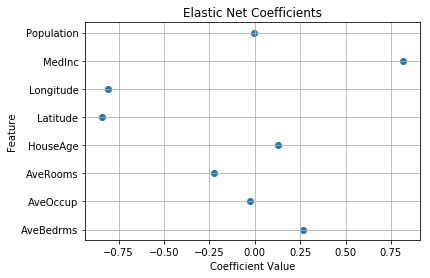

In [301]:
plt.scatter(elastnet_coef, features)
plt.title('Elastic Net Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid()

Yes, in the regular linear regression and elastic net, the coefficient values are similar and agree on which features are important. 